<a href="https://colab.research.google.com/github/LRLeite/Data-Analytics/blob/main/An%C3%A1lise%20Copas%20do%20Mundo%20FIFA/Fifa_World_Cups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise das Copas do Mundo FIFA**


Este notebook tem como objetivo realizar uma análise exploratória e aprofundada dos dados das Copas do Mundo FIFA masculina, desde 1930 até 2022. Foram utilizadas as bibliotecas `pandas` para manipulação de dados e `matplotlib` e `seaborn` para visualização.

A análise abordará as seguintes questões-chave:

1. Quantas vezes cada seleção conquistou a Copa do Mundo FIFA?
2. Quais seleções obtiveram mais medalhas (ouro, prata, bronze) ao longo da história?
3. Quantas vezes cada seleção participou da Copa do Mundo FIFA?
4. Quais seleções foram desclassificadas na primeira fase da competição com maior frequência?
5. Qual a média de gols por jogo nas Copas do Mundo FIFA ao longo da história?

Datasets utilizados na análise: [FIFA Football World Cup Dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/fifa-football-world-cup-dataset).

# **Bibliotecas**

In [1]:
import kagglehub
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# **Preparação e Limpeza dos Dados**
Nesta seção, os datasets serão carregados, sua estrutura e tipos de dados serão inspecionadas, e serão conduzidas etapas de limpeza e transformação necessárias para garantir a qualidade dos dados para a análise.

## Datasets com registros de todas as Copas do Mundo de Futebol (de 1930 a 2022)

In [2]:
#Download datasets diretamente do Kaggle
diretorio = kagglehub.dataset_download("iamsouravbanerjee/fifa-football-world-cup-dataset")

In [3]:
#Cria um Drive para receber os dados
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Obtém a lista de todos os arquivos no diretório
all_files = os.listdir(diretorio)
print(f"Arquivos encontrados no diretório '{diretorio}':")
for f in all_files:
    print(f"- {f}")

Arquivos encontrados no diretório '/kaggle/input/fifa-football-world-cup-dataset':
- FIFA - 1958.csv
- FIFA - 1938.csv
- FIFA - 1966.csv
- FIFA - 1950.csv
- FIFA - 1954.csv
- FIFA - 1982.csv
- FIFA - 2010.csv
- FIFA - 1962.csv
- FIFA - 2014.csv
- FIFA - 1934.csv
- FIFA - 1998.csv
- FIFA - 1986.csv
- FIFA - 1978.csv
- FIFA - World Cup Summary.csv
- FIFA - 2006.csv
- FIFA - 2002.csv
- FIFA - 2022.csv
- FIFA - 1990.csv
- FIFA - 1930.csv
- FIFA - 2018.csv
- FIFA - 1994.csv
- FIFA - 1974.csv
- FIFA - 1970.csv


In [5]:
#Dentro do diretório existe um arquivo que não será utilizado e por isso é necessário selecionar apenas os arquivos de interesse.
#Dessa forma, é preciso criar uma regra que busque apenas os arquivos desejados.

  # Padrão de expressão regular para "FIFA - AAAA.csv" onde AAAA é um número de 4 dígitos
  # ^: Início da string
  # FIFA - : Corresponde literalmente a "FIFA - "
  # (\d{4}): Captura exatamente 4 dígitos (o ano)
  # \.csv$: Corresponde literalmente a ".csv" e $: Fim da string

file_pattern = re.compile(r"^FIFA - (\d{4})\.csv$")

In [6]:
#Lista para armazenar os DataFrames individuais
all_dfs = []

#Iterar sobre todos os arquivos do diretório, identificar aqueles que correspondem ao padrão de nomes, ler e prepará-los para a concatenação.

for file_name in all_files:
    match = file_pattern.match(file_name) #Tenta casar o padrão com o nome do arquivo

    if match: #Se o padrão casar, é um arquivo de ano da Copa
        file_path = os.path.join(diretorio, file_name)
        ano = int(match.group(1)) #Extrai o grupo capturado (o ano) e converte para int

        try:
            df = pd.read_csv(file_path)
            df['ano_copa'] = ano #Adiciona a coluna "ano_copa" ao dataset a partir do ano no nome do arquivo
            all_dfs.append(df)
        except Exception as e:
            print(f"Erro ao ler {file_name}: {e}")
    else:
        print(f"Arquivo '{file_name}' ignorado, pois não faz parte do conjunto de dados a ser selecionado")

Arquivo 'FIFA - World Cup Summary.csv' ignorado, pois não faz parte do conjunto de dados a ser selecionado


In [7]:
#Concatena todos os DataFrames em um único DataFrame
if all_dfs:
    df_copas = pd.concat(all_dfs, ignore_index = True)
    print("\nDataFrame final 'df_copas' criado com sucesso!")
else:
    print("Nenhum arquivo CSV foi lido. Verifique os caminhos e os nomes dos arquivos.")

#Explorar estrutura do dataset
df_copas.head()


DataFrame final 'df_copas' criado com sucesso!


,Position,Team,Games Played,Win,Draw,Loss,Goals For,Goals Against,Goal Difference,Points,ano_copa
0,1,Brazil,6,5,1,0,16,4,12,11,1958
1,2,Sweden,6,4,1,1,12,7,5,9,1958
2,3,France,6,4,0,2,23,15,8,8,1958
3,4,West Germany,6,2,2,2,12,14,−2,6,1958
4,5,Wales,5,1,3,1,4,4,0,5,1958


In [8]:
#Converter todos os títulos de colunas para lowercase do dataset df_copas
df_copas.columns = df_copas.columns.str.lower()

#Renomear colunas
df_copas = df_copas.rename(columns = {'games played': 'games_played',
                                      'goals for': 'goals_for',
                                      'goals against': 'goals_against',
                                      'goal difference': 'goal_difference'})
df_copas.head()

,position,team,games_played,win,draw,loss,goals_for,goals_against,goal_difference,points,ano_copa
0,1,Brazil,6,5,1,0,16,4,12,11,1958
1,2,Sweden,6,4,1,1,12,7,5,9,1958
2,3,France,6,4,0,2,23,15,8,8,1958
3,4,West Germany,6,2,2,2,12,14,−2,6,1958
4,5,Wales,5,1,3,1,4,4,0,5,1958


In [9]:
#Verificar a existência de valores ausentes
df_copas.isna().sum()

,0
position,0
team,0
games_played,0
win,0
draw,0
loss,0
goals_for,0
goals_against,0
goal_difference,0
points,0


In [10]:
#Verificar os nomes de cada seleção, porque algumas seleções tiveram nomes diferentes ao longo do tempo
df_copas.team.unique()

array(['Brazil', 'Sweden', 'France', 'West Germany', 'Wales',
       'Soviet Union', 'Northern Ireland', 'Yugoslavia', 'Czechoslovakia',
       'Hungary', 'England', 'Paraguay', 'Argentina', 'Scotland',
       'Austria', 'Mexico', 'Italy', 'Switzerland', 'Cuba', 'Romania',
       'Germany', 'Poland', 'Norway', 'Belgium', 'Netherlands',
       'Dutch East Indies', 'Portugal', 'Uruguay', 'North Korea', 'Spain',
       'Chile', 'Bulgaria', 'United States', 'Bolivia', 'Turkey',
       'South Korea', 'Algeria', 'Cameroon', 'Honduras', 'Peru', 'Kuwait',
       'New Zealand', 'El Salvador', 'Ghana', 'Japan', 'Slovakia',
       'Ivory Coast', 'Slovenia', 'South Africa', 'Australia', 'Serbia',
       'Denmark', 'Greece', 'Nigeria', 'Colombia', 'Costa Rica',
       'Ecuador', 'Croatia', 'Bosnia and Herzegovina', 'Russia', 'Iran',
       'Egypt', 'FR Yugoslavia', 'Morocco', 'Jamaica', 'Tunisia',
       'Saudi Arabia', 'Iraq', 'Canada', 'Ukraine', 'Czech Republic',
       'Angola', 'Trinidad and T

Por contextos históricos, a Alemanha está dividida em dois países neste dataset: East Germany e West Germany. Para conseguir contabilizar os títulos mundiais de cada país, interpretarei os dados a partir da soma de East Germany e West Germany

In [11]:
#Substituir o nome da Alemanha para unificar os títulos
df_copas = df_copas.replace(["East Germany", "West Germany"], "Germany")
df_copas.team.unique()

array(['Brazil', 'Sweden', 'France', 'Germany', 'Wales', 'Soviet Union',
       'Northern Ireland', 'Yugoslavia', 'Czechoslovakia', 'Hungary',
       'England', 'Paraguay', 'Argentina', 'Scotland', 'Austria',
       'Mexico', 'Italy', 'Switzerland', 'Cuba', 'Romania', 'Poland',
       'Norway', 'Belgium', 'Netherlands', 'Dutch East Indies',
       'Portugal', 'Uruguay', 'North Korea', 'Spain', 'Chile', 'Bulgaria',
       'United States', 'Bolivia', 'Turkey', 'South Korea', 'Algeria',
       'Cameroon', 'Honduras', 'Peru', 'Kuwait', 'New Zealand',
       'El Salvador', 'Ghana', 'Japan', 'Slovakia', 'Ivory Coast',
       'Slovenia', 'South Africa', 'Australia', 'Serbia', 'Denmark',
       'Greece', 'Nigeria', 'Colombia', 'Costa Rica', 'Ecuador',
       'Croatia', 'Bosnia and Herzegovina', 'Russia', 'Iran', 'Egypt',
       'FR Yugoslavia', 'Morocco', 'Jamaica', 'Tunisia', 'Saudi Arabia',
       'Iraq', 'Canada', 'Ukraine', 'Czech Republic', 'Angola',
       'Trinidad and Tobago', 'Togo', 

In [12]:
#Verificar a quantidade de seleções que contém "Germany" no nome
df_copas['team'].loc[df_copas['team'].str.contains("Germany")].nunique()

1

In [13]:
#Reordenar colunas
df_copas = df_copas[['position', 'ano_copa', 'team',
                     'games_played',	'win',	'draw',
                     'loss',	'goals_for',	'goals_against',
                     'goal_difference', 'points']]
df_copas.head(2)

,position,ano_copa,team,games_played,win,draw,loss,goals_for,goals_against,goal_difference,points
0,1,1958,Brazil,6,5,1,0,16,4,12,11
1,2,1958,Sweden,6,4,1,1,12,7,5,9


## Dataset com o resumo de todas as Copas do Mundo FIFA

In [14]:
#Importar dataset
fifa_summary = pd.read_csv('/kaggle/input/fifa-football-world-cup-dataset/FIFA - World Cup Summary.csv')
fifa_summary.head()

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
0,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
1,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1
2,1938,France,Italy,Hungary,Brazil,15,18,84,4.7
3,1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0
4,1954,Switzerland,West Germany,Hungary,Austria,16,26,140,5.4


In [15]:
#Converter todos os títulos de colunas para lowercase do dataset fifa_summary
fifa_summary.columns = fifa_summary.columns.str.lower()

#Renomear colunas
fifa_summary = fifa_summary.rename(columns = {
    'runner up': 'second_place',
    'third place': 'third_place',
    'matches played': 'matches_played',
    'goals scored': 'goals_scored',
    'avg goals per game': 'avg_goals_per_game'})

fifa_summary.head()

,year,host,champion,second_place,third_place,teams,matches_played,goals_scored,avg_goals_per_game
0,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6
1,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1
2,1938,France,Italy,Hungary,Brazil,15,18,84,4.7
3,1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0
4,1954,Switzerland,West Germany,Hungary,Austria,16,26,140,5.4


In [16]:
#Média de gols por ano

fifa_summary['avg_goals_per_year'] = round(fifa_summary['goals_scored'] / fifa_summary['matches_played'], 2)
fifa_summary.head()

,year,host,champion,second_place,third_place,teams,matches_played,goals_scored,avg_goals_per_game,avg_goals_per_year
0,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6,4.38
1,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1,4.12
2,1938,France,Italy,Hungary,Brazil,15,18,84,4.7,4.67
3,1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0,4.00
4,1954,Switzerland,West Germany,Hungary,Austria,16,26,140,5.4,5.38


# **Análise de Dados**

## **1. Quantas vezes cada seleção conquistou a Copa do Mundo FIFA?**

In [17]:
#Selecionar os dados dos campeões para gerar uma plotagem com o número de campeonatos mundiais conquistados por cada seleção
champions = df_copas[['team', 'ano_copa']].loc[df_copas.position == 1]
champions.team.unique()

array(['Brazil', 'Italy', 'England', 'Uruguay', 'Germany', 'Spain',
       'France', 'Argentina'], dtype=object)

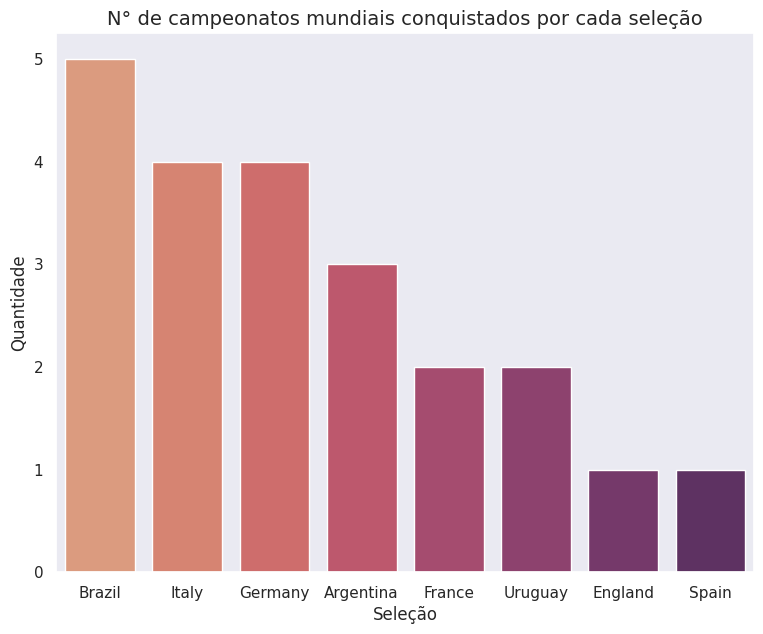

In [18]:
#Obter a order das seleções para a plotagem
team_order = champions['team'].value_counts().index

#Cria uma paleta de cores com o mesmo número de cores que o número de seleções
num_teams = len(team_order)
colors = sns.color_palette("flare", n_colors = num_teams)

#Cria um dicionário que mapeia cada seleção com a cor correspondente na ordem do ranking
palette_dict = dict(zip(team_order, colors))

plt.figure(figsize = (9, 7))
sns.set_theme(style = "dark")

ax = sns.countplot(x = 'team', data = champions,
                   order = team_order,
                   palette = palette_dict,
                   hue = 'team',
                   legend = False)

plt.ylabel('Quantidade')
plt.xlabel('Seleção')
plt.title('N° de campeonatos mundiais conquistados por cada seleção', fontsize = 14)
plt.show()

## **2. Quais seleções obtiveram mais medalhas (ouro, prata, bronze) ao longo da história?**


In [19]:
# Seu código original com a correção
df_podiums = (df_copas[df_copas['position'].isin([1, 2, 3])]
              .groupby(['team', 'position'])['ano_copa']
              .count()
              .unstack(fill_value=0)
              .rename(columns={1: 'ouro', 2: 'prata', 3: 'bronze'})
              .reset_index()
              .sort_values(by=['ouro', 'prata', 'bronze'], ascending=False)
              .reset_index(drop=True))

# Remove o nome do índice das colunas
df_podiums.columns.name = None

print(df_podiums)

              team  ouro  prata  bronze
0           Brazil     5      2       2
1          Germany     4      4       4
2            Italy     4      2       1
3        Argentina     3      3       0
4           France     2      2       2
5          Uruguay     2      0       0
6          England     1      0       0
7            Spain     1      0       0
8      Netherlands     0      3       1
9   Czechoslovakia     0      2       0
10         Hungary     0      2       0
11         Croatia     0      1       2
12          Sweden     0      1       2
13          Poland     0      0       2
14         Austria     0      0       1
15         Belgium     0      0       1
16           Chile     0      0       1
17        Portugal     0      0       1
18          Turkey     0      0       1
19   United States     0      0       1


In [20]:
df_podiums.head()

,team,ouro,prata,bronze
0,Brazil,5,2,2
1,Germany,4,4,4
2,Italy,4,2,1
3,Argentina,3,3,0
4,France,2,2,2


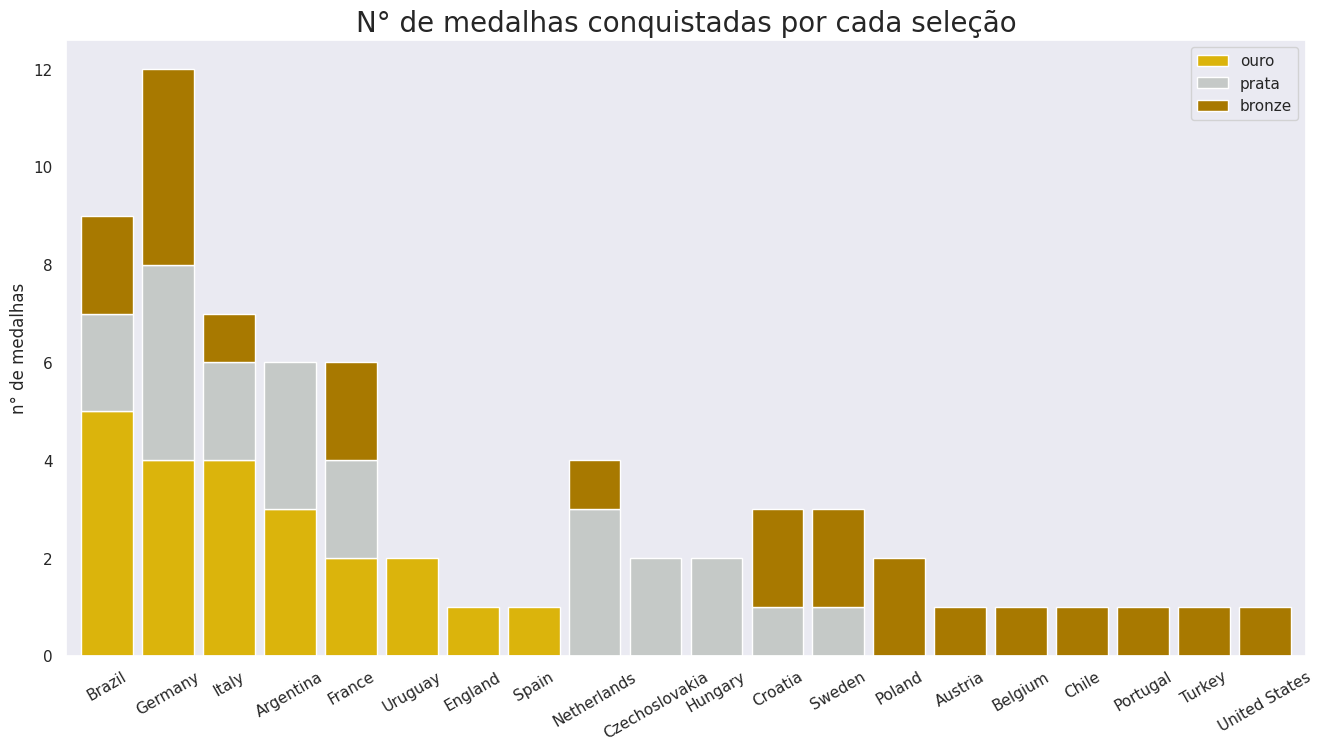

In [21]:
#Plotar um gráfico empilhado com o número de medalhas conquistadas por cada seleção
plt.rcParams["figure.figsize"] = (16,8)
sns.set_theme(style = "dark")

ax = df_podiums.set_index('team').plot(kind = 'bar', stacked = True, color = ['#dbb40c', '#c5c9c7', '#a87900'], width = 0.85)

plt.ylabel('n° de medalhas')
ax.set(xlabel=None)
plt.title('N° de medalhas conquistadas por cada seleção', fontsize = 20)
plt.xticks(rotation = 30)
plt.show()

## **3. Quantas vezes cada seleção participou da Copa do Mundo FIFA?**




In [22]:
#Número de edições da Copa do Mundo FIFA
df_copas['ano_copa'].nunique()

22

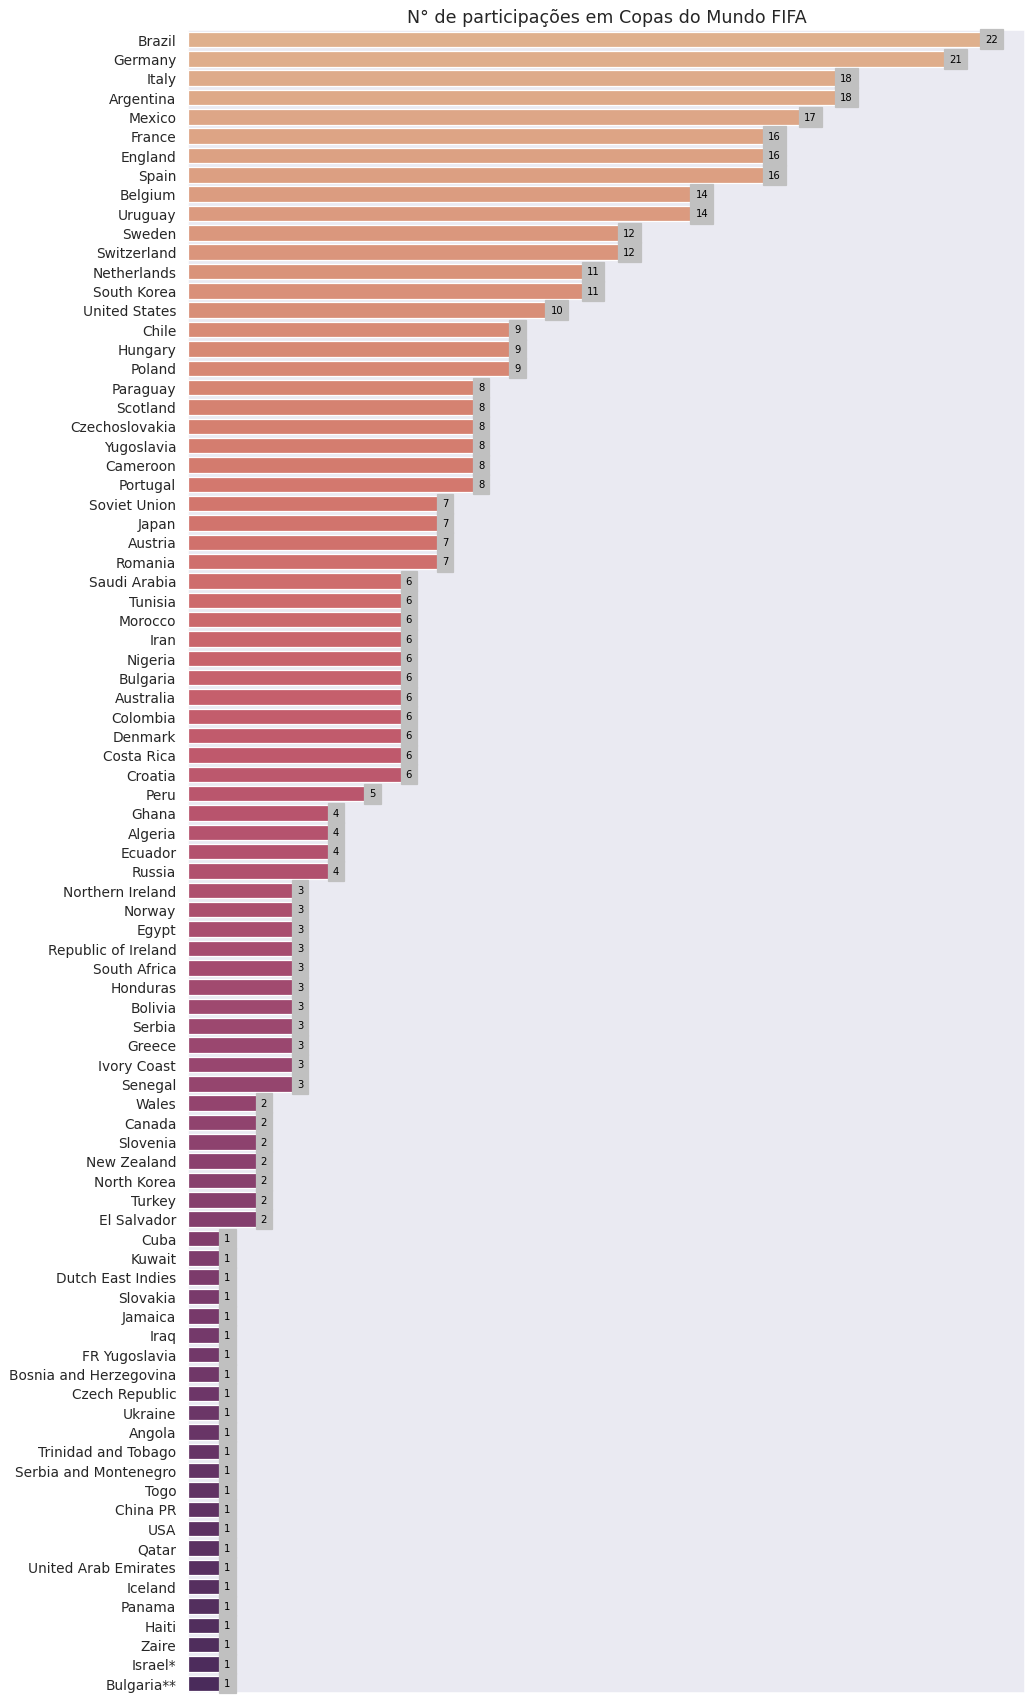

In [23]:
#Obter a order das seleções para a plotagem
team_order = df_copas['team'].value_counts().index

#Cria uma paleta de cores com o mesmo número de cores que o número de seleções
num_teams = len(team_order)
colors = sns.color_palette("flare", n_colors = num_teams)

#Cria um dicionário que mapeia cada seleção com a cor correspondente na ordem do ranking
palette_dict = dict(zip(team_order, colors))

#Tamanho da figura
fig = plt.figure(figsize = (12, 24), dpi = 90)
sns.set_theme(style = "dark")

#Configurações do gráfico
ax = sns.countplot(y = 'team', data = df_copas,
                   order = team_order,
                   palette = palette_dict,
                   hue = 'team',
                   legend = False)

plt.title('N° de participações em Copas do Mundo FIFA', fontsize = 14)

#Remover eixo X
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)

#Remover label do eixo y
ax.set(ylabel = None)

#Loop para colocar o rótulo de dados na posição adequada
for p in ax.patches:
  _x = p.get_width() #Posiciona ao final da barra
  _y = p.get_y() + p.get_height() / 2  #Posiciona y no meio da barra
  value = int(p.get_width())
  ax.text(_x, _y, value, ha = "left", va = "center",
          fontsize = 8,
          color = 'black',
          backgroundcolor = 'silver')

plt.show()

## **4. Quais seleções foram desclassificadas na primeira fase da competição com maior frequência?**

In [24]:
#Cópia do dataset df_copas para verificar o número de vezes que as seleções não se classificaram para a fase eliminatória da competição
disqualified = df_copas.copy()
disqualified.head()

,position,ano_copa,team,games_played,win,draw,loss,goals_for,goals_against,goal_difference,points
0,1,1958,Brazil,6,5,1,0,16,4,12,11
1,2,1958,Sweden,6,4,1,1,12,7,5,9
2,3,1958,France,6,4,0,2,23,15,8,8
3,4,1958,Germany,6,2,2,2,12,14,−2,6
4,5,1958,Wales,5,1,3,1,4,4,0,5


**Houveram diferentes formatos da competição ao longo dos anos. Portanto, para conseguir os dados das seleções desclassficadas na 1° fase é necessário considerar as seguintes condições:**


* 1930 e 1950: 9 de 13 seleções foram eliminadas na primeira fase da competição
* 1934-1938: houve apenas uma fase (eliminatória) na competição; drop 1934 e 1938
* As edições de 1942 e 1946 foram canceladas pela Fifa por conta da Segunda Guerra Mundial
* 1954-1978: 8 de 16 seleções foram eliminadas na primeira fase da competição
* 1982: 12 de 24 seleções foram eliminadas na primeira fase da competição
* 1986-1994: 8 de 24 seleções foram eliminadas na primeira fase da competição
* 1998-2022: 16 de 32 seleções foram eliminadas na primeira fase da competição


In [25]:
#Manter no dataset disqualified apenas as seleções que foram desclassificadas na primeira fase da competição

disqualified.drop(disqualified[(disqualified['ano_copa'].isin([1930, 1950])) & (disqualified['position'] < 5)].index, inplace = True)
disqualified.drop(disqualified[disqualified['ano_copa'].isin([1934, 1938])].index, inplace = True)
disqualified.drop(disqualified[(disqualified['ano_copa'].isin([1954, 1958, 1962, 1966, 1970, 1974, 1978])) & (disqualified['position'] < 9)].index, inplace = True)
disqualified.drop(disqualified[(disqualified['ano_copa'] == 1982) & (disqualified['position'] < 13)]. index, inplace = True)
disqualified.drop(disqualified[(disqualified['ano_copa'].isin([1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018, 2022])) & (disqualified['position'] < 17)].index, inplace = True)

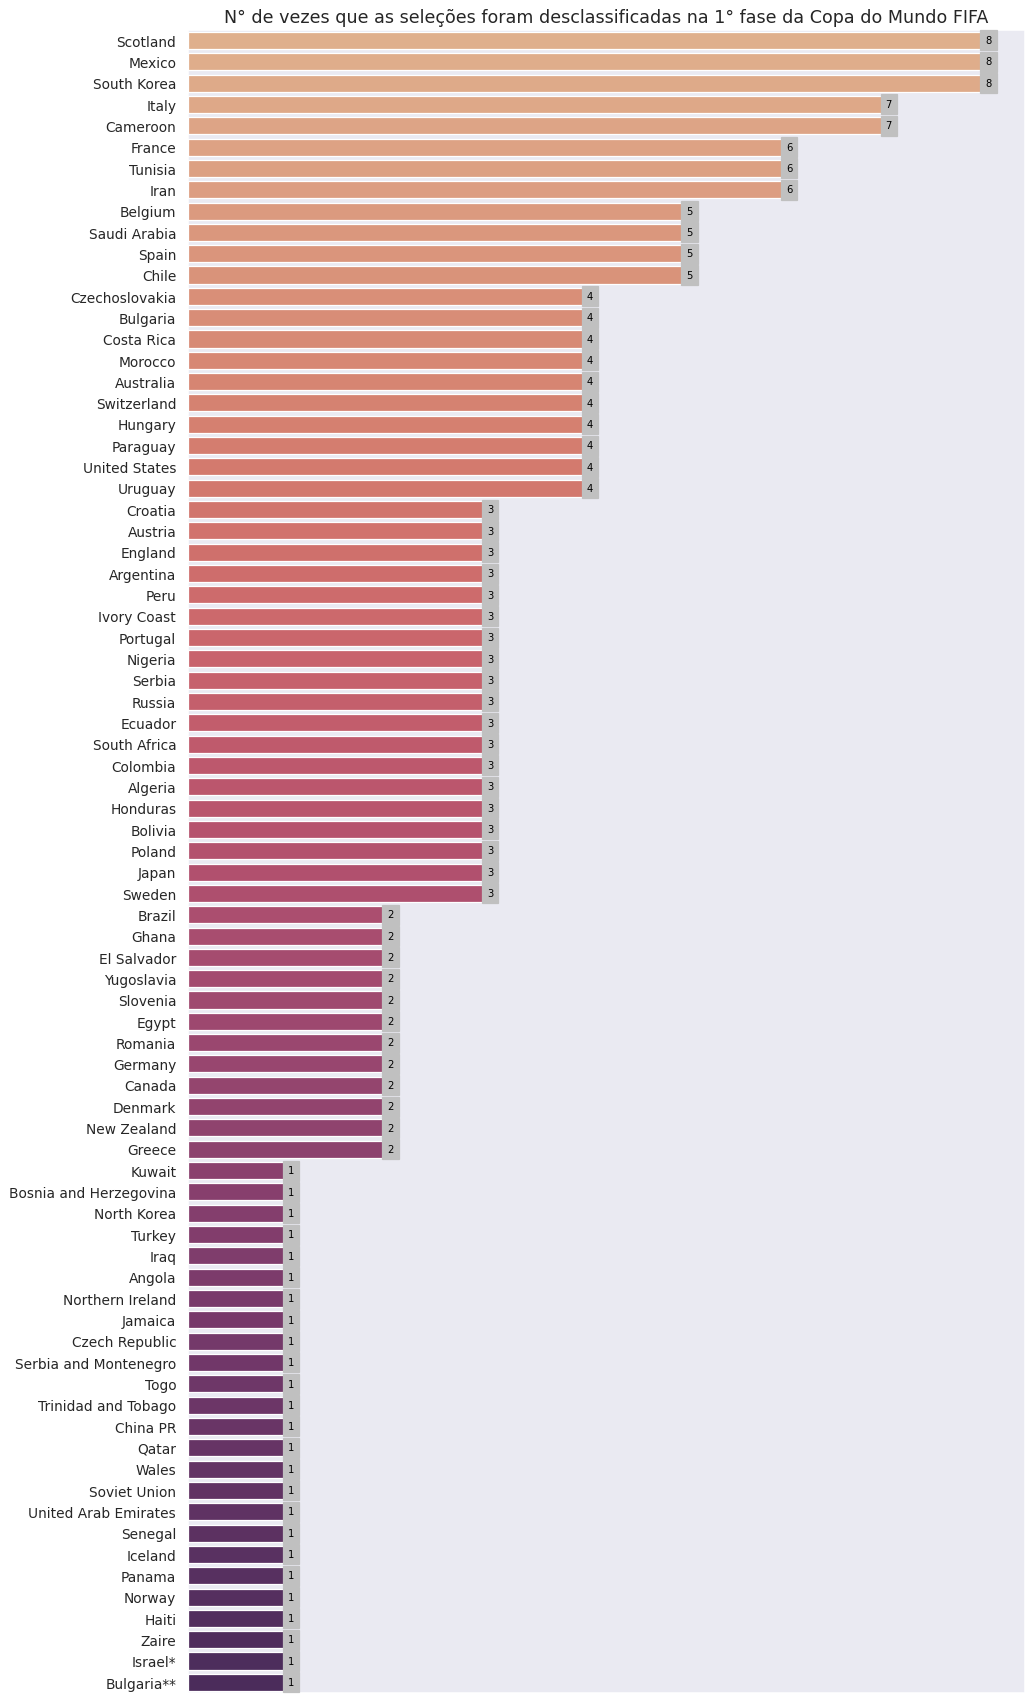

In [26]:
#Gráfico que mostra o número de vezes que as seleções foram desclassificadas na primeira fase da Copa do Mundo FIFA
#Layout da figura
fig = plt.figure(figsize = (12, 24), dpi = 90)
sns.set_theme(style = "dark")

#Obter a ordem das seleções por contagem de desclassificação
team_order = disqualified['team'].value_counts().index

# ria uma paleta de cores com o mesmo número de cores que o número de seleções
num_teams = len(team_order)
colors = sns.color_palette("flare", n_colors = num_teams)

#Cria um dicionário que mapeia cada seleção com a cor correspondente na ordem do ranking
palette_dict = dict(zip(team_order, colors))

# Ajustamos o countplot para usar o eixo y para as seleções
ax = sns.countplot(y = 'team', data = disqualified,
                   order = team_order,
                   palette = palette_dict,
                   hue = 'team',
                   legend = False)

plt.title('N° de vezes que as seleções foram desclassificadas na 1° fase da Copa do Mundo FIFA', fontsize = 14)

#Ocultar eixo X
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)

#Remover label do eixo y
ax.set(ylabel = None)

#Loop para adicionar os rótulos de dados
for p in ax.patches:
  _x = p.get_width()
  _y = p.get_y() + p.get_height() / 2 #Posiciona y no centro da barra
  value = int(p.get_width())
  ax.text(_x, _y, value, ha = "left", va = "center",
          fontsize = 8,
          color = 'black',
          backgroundcolor = 'silver')

plt.show()

## **5. Qual a média de gols por jogo nas Copas do Mundo FIFA ao longo da história?**

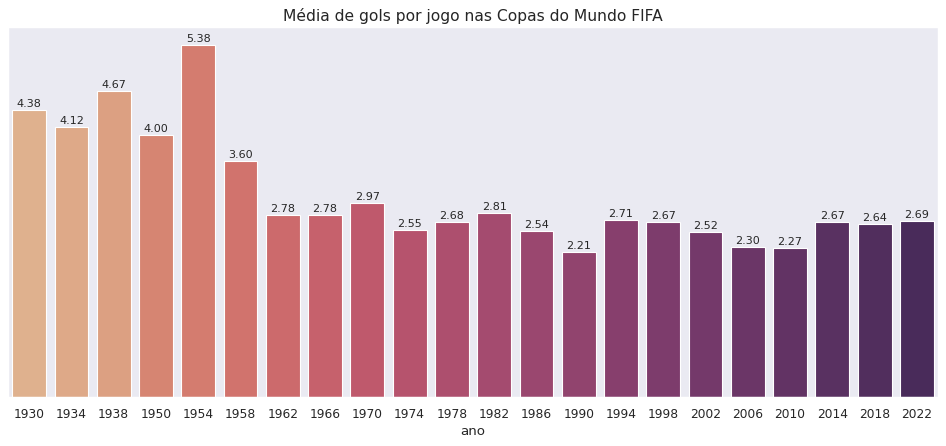

In [27]:
#Gráfico com  a média de gols por jogo nas Copas do Mundo FIFA
plt.figure(figsize = (15, 6), dpi = 80)
sns.set_theme(style = "dark")

ax = sns.barplot(x = 'year', y = 'avg_goals_per_year', data = fifa_summary, palette = "flare", hue = 'year', legend = False, errorbar = None)
plt.title('Média de gols por jogo nas Copas do Mundo FIFA', fontsize = 14)
plt.ylabel('média de gols')
plt.xlabel('ano')
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)

for p in ax.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height() + 0.05
  value = float(p.get_height())
  ax.text(_x, _y, f'{value:.2f}', ha = "center",
  fontsize = 10)

plt.show()